# Figures
Generic figures for timelag synthesis paper

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize,SqrtStretch,AsinhStretch

import synthesizAR

from formatting import rwb_cmap,get_figsize

%matplotlib inline

## Active Region Maps

In [2]:
ar = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [3]:
aia_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_171_cutout.fits')

In [4]:
hmi_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/hmi/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
hmi_map = hmi_map.rotate(order=3)
hmi_map = hmi_map.submap(aia_map.bottom_left_coord,aia_map.top_right_coord)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFa

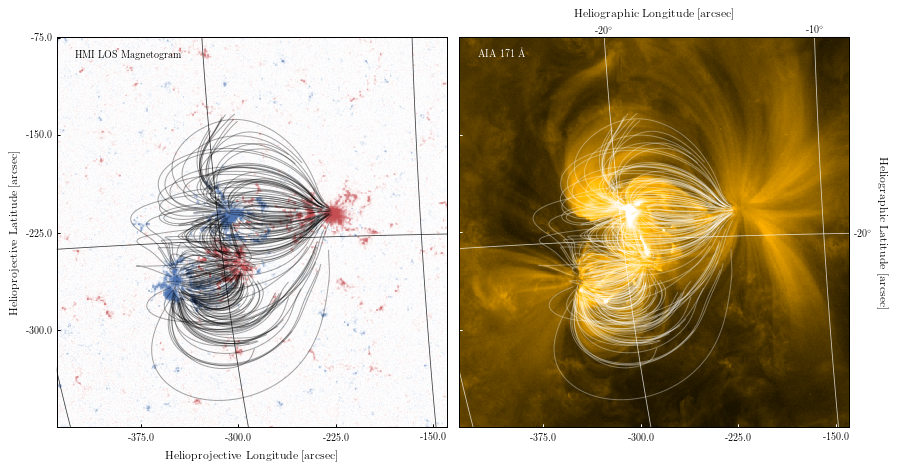

In [7]:
fig = plt.figure(figsize=get_figsize(wf=2))
line_frequency = 20
plt.subplots_adjust(wspace=0.03)
####################
## HMI
ax = fig.add_subplot(1,2,1,projection=hmi_map,)
hmi_map.plot(title=False,annotate=False,norm=matplotlib.colors.SymLogNorm(100,vmin=-1e3,vmax=1e3),cmap=rwb_cmap())
for l in ar.loops[::line_frequency]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(hmi_map.coordinate_frame)
    ax.plot_coord(c, '-', color='k', lw=1, alpha=0.35)
ax.grid(alpha=0)
# HPC Axes
lon,lat = ax.coords[0],ax.coords[1]
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
lon.set_axislabel(r'Helioprojective Longitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
lat.set_axislabel(r'Helioprojective Latitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
# HGS Axes
hgs_lon,hgs_lat = hmi_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='k')
hgs_lat.set_ticklabel_visible(False)
hgs_lon.set_ticklabel_visible(False)
hgs_lon.set_axislabel('')#'Helioprojective Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_axislabel('')#'Helioprojective Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
# Label
xtext,ytext = hmi_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=hmi_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'HMI LOS Magnetogram',color='k')#,fontsize=plt.rcParams['axes.labelsize'])
#####################
## AIA -- 171
ax = fig.add_subplot(1,2,2,projection=aia_map,)
aia_map.plot(title=False,annotate=False,norm=ImageNormalize(vmin=0,vmax=5e3,stretch=AsinhStretch(0.1)))
for l in ar.loops[::line_frequency]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(aia_map.coordinate_frame)
    ax.plot_coord(c, '-', color='w', lw=1, alpha=0.35)
ax.grid(alpha=0)
# HPC Axes
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticks(color='w')
lat.set_ticks(color='w')
lat.set_ticklabel_visible(False)
# HGS Axes
hgs_lon,hgs_lat = aia_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='w')
hgs_lat.set_axislabel('Heliographic Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lon.set_axislabel('Heliographic Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_ticklabel_visible(True)
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
hgs_lon.set_ticklabel_visible(True)
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
# Label
xtext,ytext = aia_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=aia_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'AIA 171 $\mathrm{\AA}$',color='w')#,fontsize=plt.rcParams['axes.labelsize'])
#######################
# Save
fig.savefig('figures/hmi_aia_lines.pdf',)